# Image Classification using CNN 






* This is a multi-classification problem.
* There are a sum total of 6354 orchid images which can be futrher categorised to 156 classes.
* Every orchid image belongs to one and only one image class.
* Naive approach: For the training set: Max appering class image count / no.of images in training dataset = 5.23%
* First model: In the fisrst model we built a base CNN model. However, the model id facing very high overfitting issue. Max Validation accuracy: 36%
* Second model: In the second model we add a pre-trained model to the top of the model we built in the first step. The accuracy levels are similar to the first step. However there still exists some over fitting. Max Validation accuracy: 32.23%
* Third model: In the third model, we made the added pre-trained model TRAINABLE and also added a learning rate to it.
* The third model validation accuracy sees a slight dip in the. However, this model resolves the issue of overfitting. Max Validation accuracy: 27.29%.
* LOSS FUNCTON: sparse_categorical_crossentropy; OPTIMIZER: Adam; METRICS: Accuracy
* All the 3 trained models perform better than the Naive approach baseline of 5.23%.
* CONCLUSION: Of the 3 models, the third model (trainable pre-trained + learning rate) though has a relatively lower accuracy rate does not suffer from over-fitting. Hence we choose this as the best model for predicting the class of an orchid image.


### Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)
import os
import pandas as pd
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

2022-10-21 22:21:35.939169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


* The dataset exists in a format where all the images (training and validation) are in a single folder and we have 2 separate text files training and validation respectively which provide information on which image belongs to which class. 
* We will be generating dataframes from the text files containing the filenames column and a column which has the class names and directly read the images from the directory with their respective class names mapped.

### Generating Dataframes 

In [2]:
training_df = pd.read_csv('/Users/Manisha/Documents/BAN 676 - Deep Learning/Assignment2/Orchid Flowers Dataset-v1.1/Species_Classifier/Training_Data_for_Species.csv', header = None)

In [3]:
training_df.head()

,0,1
0,1.jpg,1
1,2.jpg,1
2,3.jpg,1
3,4.jpg,1
4,5.jpg,1


In [4]:
training_df.columns =['train_image', 'Class']

In [5]:
training_df['train_image'] = training_df['train_image'].astype('string')
training_df['Class'] = training_df['Class'].astype('string')

In [6]:
validation_df = pd.read_csv('/Users/Manisha/Documents/BAN 676 - Deep Learning/Assignment2/Orchid Flowers Dataset-v1.1/Species_Classifier/Validation_Data_for_Species.csv',header =None)

In [7]:
validation_df.head()

,0,1
0,25.jpg,1
1,26.jpg,1
2,7032.jpg,1
3,7033.jpg,1
4,7034.jpg,1


In [8]:
validation_df.columns =['valid_image', 'Class']

In [9]:
validation_df['valid_image'] = validation_df['valid_image'].astype('string')
validation_df['Class'] = validation_df['Class'].astype('string')

In [10]:
print(training_df.shape)
print(validation_df.shape)

(5119, 2)
(1235, 2)


### Using ImageDataGenerator with flow_from_dataframe to load images

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True)

In [12]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
src_path = '/Users/Manisha/Documents/BAN 676 - Deep Learning/Assignment2/Orchid Flowers Dataset-v1.1/Orchid_Images'

train_generator=train_datagen.flow_from_dataframe(
dataframe=training_df,
directory= src_path,
x_col='train_image',
y_col='Class',
subset=None,
batch_size=32,
seed=42,
shuffle=True,
class_mode="sparse",
target_size=(32,32))

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=validation_df,
directory=src_path,
x_col='valid_image',
y_col='Class',
subset=None,
batch_size=32,
seed=42,
shuffle=True,
class_mode="sparse",
target_size=(32,32))

Found 5119 validated image filenames belonging to 156 classes.
Found 1235 validated image filenames belonging to 156 classes.


### Naive Approach to compare the performance on CNN model.

In [14]:
unique, counts = np.unique(training_df["Class"], return_counts = True)
dict(zip(unique, counts))

{'1': 24,
 '10': 12,
 '100': 107,
 '101': 3,
 '102': 2,
 '103': 20,
 '104': 21,
 '105': 9,
 '106': 98,
 '107': 46,
 '108': 37,
 '109': 9,
 '11': 179,
 '110': 92,
 '111': 28,
 '112': 10,
 '113': 14,
 '114': 21,
 '115': 16,
 '116': 20,
 '117': 74,
 '118': 37,
 '119': 26,
 '12': 122,
 '120': 12,
 '121': 3,
 '122': 3,
 '123': 10,
 '124': 4,
 '125': 121,
 '126': 12,
 '127': 17,
 '128': 85,
 '129': 64,
 '13': 29,
 '130': 31,
 '131': 8,
 '132': 9,
 '133': 82,
 '134': 10,
 '135': 45,
 '136': 4,
 '137': 18,
 '138': 3,
 '139': 32,
 '14': 2,
 '140': 4,
 '141': 61,
 '142': 10,
 '143': 14,
 '144': 10,
 '145': 80,
 '146': 7,
 '147': 5,
 '148': 8,
 '149': 12,
 '15': 16,
 '150': 11,
 '151': 36,
 '152': 4,
 '153': 4,
 '154': 5,
 '155': 12,
 '156': 37,
 '16': 3,
 '17': 24,
 '18': 9,
 '19': 176,
 '2': 11,
 '20': 42,
 '21': 20,
 '22': 78,
 '23': 101,
 '24': 46,
 '25': 6,
 '26': 21,
 '27': 239,
 '28': 49,
 '29': 29,
 '3': 77,
 '30': 31,
 '31': 25,
 '32': 45,
 '33': 268,
 '34': 15,
 '35': 104,
 '36': 5,
 '3

In [15]:
max(training_df['Class'].value_counts())/len(training_df['Class'])

0.05235397538581754

### Model 1: Base CNN Model 

In [18]:
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(156))
    model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [20]:
model.compile(optimizer="adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=30)

/var/folders/pd/gpgs3lh15wx458zc6_s0w4100000gp/T/ipykernel_69257/424017173.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
160/160 [==============================] - 44s 271ms/step - loss: 3.9021 - accuracy: 0.1721 - val_loss: 5.3536 - val_accuracy: 0.0413
Epoch 2/30
160/160 [==============================] - 37s 234ms/step - loss: 3.0387 - accuracy: 0.2754 - val_loss: 5.1729 - val_accuracy: 0.0704
Epoch 3/30
160/160 [==============================] - 35s 217ms/step - loss: 2.7190 - accuracy: 0.3411 - val_loss: 3.8384 - val_accuracy: 0.1344
Epoch 4/30
160/160 [==============================] - 35s 216ms/step - loss: 2.4675 - accuracy: 0.3887 - val_loss: 3.2805 - val_accuracy: 0.2721
Epoch 5/30
160/160 [==============================] - 36s 226ms/step - loss: 2.2865 - accuracy: 0.4149 - val_loss: 3.3895 - val_accuracy: 0.2964
Epoch 6/30
160/160 [==============================] - 33s 207ms/step - loss: 2.1075 - accuracy: 0.4536 - val_loss: 3.6945 - val_accuracy: 0.2745
Epoch 7/30
160/160 [==============================] - 31s 196ms/step - loss: 1.9897 - accuracy: 0.4800 - val_loss: 3.7796 - val_ac

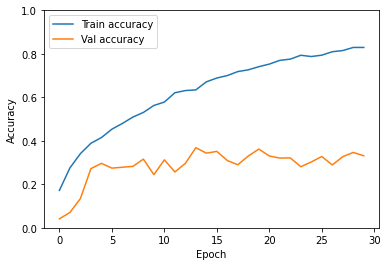

In [22]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

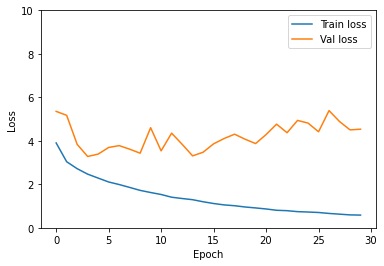

In [24]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 10])

plot_history(history)

### Model 2: Adding pre-trained model (DenseNet121) on top of the first base model.

In [43]:
base_model = keras.applications.DenseNet121(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False
ft_model = Sequential()
ft_model.add(base_model)
ft_model.add(GlobalAveragePooling2D())
ft_model.add(Dense(512))
ft_model.add(Activation('relu'))
ft_model.add(Dropout(0.5))
ft_model.add(Dense(156))
ft_model.add(Activation('softmax'))

In [44]:
ft_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 156)               80028     
                                                      

In [45]:
ft_model.compile(optimizer="adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history= ft_model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=30)

/var/folders/pd/gpgs3lh15wx458zc6_s0w4100000gp/T/ipykernel_69257/218963487.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= ft_model.fit_generator(generator=train_generator,


Epoch 1/30
160/160 [==============================] - 54s 300ms/step - loss: 4.3288 - accuracy: 0.1129 - val_loss: 3.7798 - val_accuracy: 0.1822
Epoch 2/30
160/160 [==============================] - 43s 267ms/step - loss: 3.6836 - accuracy: 0.1850 - val_loss: 3.5129 - val_accuracy: 0.2211
Epoch 3/30
160/160 [==============================] - 42s 263ms/step - loss: 3.3996 - accuracy: 0.2284 - val_loss: 3.3236 - val_accuracy: 0.2607
Epoch 4/30
160/160 [==============================] - 42s 263ms/step - loss: 3.2140 - accuracy: 0.2491 - val_loss: 3.2315 - val_accuracy: 0.2672
Epoch 5/30
160/160 [==============================] - 43s 269ms/step - loss: 3.0965 - accuracy: 0.2551 - val_loss: 3.1498 - val_accuracy: 0.2818
Epoch 6/30
160/160 [==============================] - 40s 248ms/step - loss: 2.9803 - accuracy: 0.2852 - val_loss: 3.1167 - val_accuracy: 0.2899
Epoch 7/30
160/160 [==============================] - 39s 246ms/step - loss: 2.8784 - accuracy: 0.3006 - val_loss: 3.1074 - val_ac

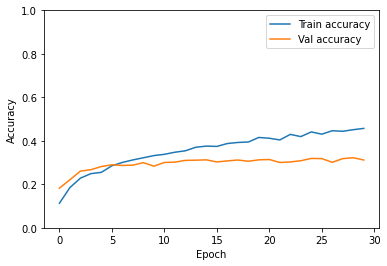

In [47]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

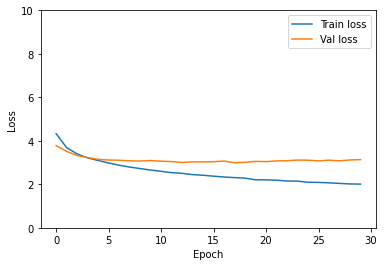

In [48]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 10])

plot_history(history)

### Model 3: Making pre-trained model trainable + Leraning Rate

In [49]:
base_model.trainable = True

ft_model.compile(optimizer=keras.optimizers.Adam(1e-5), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history= ft_model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=30)

/var/folders/pd/gpgs3lh15wx458zc6_s0w4100000gp/T/ipykernel_69257/218963487.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= ft_model.fit_generator(generator=train_generator,


Epoch 1/30
160/160 [==============================] - 76s 474ms/step - loss: 5.3962 - accuracy: 0.0973 - val_loss: 4.8877 - val_accuracy: 0.1231
Epoch 2/30
160/160 [==============================] - 78s 489ms/step - loss: 4.9165 - accuracy: 0.1008 - val_loss: 4.8109 - val_accuracy: 0.1174
Epoch 3/30
160/160 [==============================] - 74s 460ms/step - loss: 4.6117 - accuracy: 0.1061 - val_loss: 4.6121 - val_accuracy: 0.1304
Epoch 4/30
160/160 [==============================] - 75s 470ms/step - loss: 4.3560 - accuracy: 0.1123 - val_loss: 4.4236 - val_accuracy: 0.1360
Epoch 5/30
160/160 [==============================] - 72s 451ms/step - loss: 4.1753 - accuracy: 0.1252 - val_loss: 4.2485 - val_accuracy: 0.1498
Epoch 6/30
160/160 [==============================] - 73s 456ms/step - loss: 4.1290 - accuracy: 0.1201 - val_loss: 4.1839 - val_accuracy: 0.1538
Epoch 7/30
160/160 [==============================] - 87s 544ms/step - loss: 4.0240 - accuracy: 0.1293 - val_loss: 4.0658 - val_ac

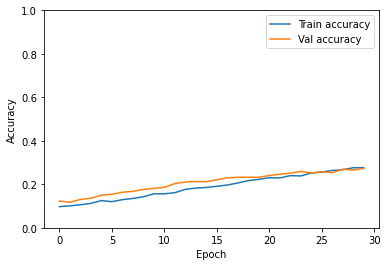

In [52]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

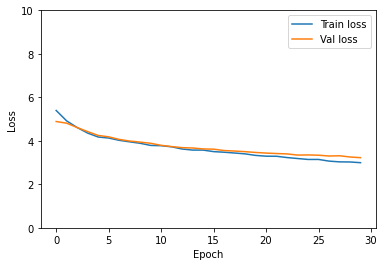

In [53]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 10])

plot_history(history)